In [43]:
import json
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [44]:

# Ruta del archivo JSON
file_path = r"C:\Users\yanin\OneDrive\Desktop\proyecto final\archivos\google\metadata-sitios-20250315T151227Z-002\metadata-sitios\10.json"

# Intentar cargar el archivo JSON directamente
try:
    with open(file_path, "r", encoding="utf-8") as f:
        data = json.load(f)  # Si el archivo ya es un JSON válido, esto funcionará

except json.JSONDecodeError:
    print("⚠️ Error al cargar el JSON. Intentando corregir el formato...")

    # Si el archivo tiene líneas separadas como JSONL, corregirlo
    with open(file_path, "r", encoding="utf-8") as f:
        lines = f.readlines()
    
    # Envolver en corchetes y agregar comas entre líneas
    fixed_content = "[\n" + ",\n".join(line.strip() for line in lines if line.strip()) + "\n]"

    # Guardar el JSON corregido en un nuevo archivo
    file_fixed_path = file_path.replace(".json", "_fixed.json")
    with open(file_fixed_path, "w", encoding="utf-8") as f:
        f.write(fixed_content)
    
    # Volver a intentar cargar el JSON corregido
    with open(file_fixed_path, "r", encoding="utf-8") as f:
        data = json.load(f)
    
    print(f"✅ Archivo corregido guardado en: {file_fixed_path}")

# Convertir los datos a un DataFrame de pandas
df = pd.DataFrame(data)

# Filtrar solo los restaurantes
df_restaurants = df[df['category'].apply(lambda x: 'Restaurant' in x if isinstance(x, list) else False)]

# Convertir las listas en tuplas para poder detectar duplicados
df_restaurants['category'] = df_restaurants['category'].apply(tuple)

# Ver las primeras filas
print(df_restaurants.head())

# Guardar el DataFrame filtrado en un CSV
df_restaurants.to_csv("restaurantes_filtrados.csv", index=False)


⚠️ Error al cargar el JSON. Intentando corregir el formato...
✅ Archivo corregido guardado en: C:\Users\yanin\OneDrive\Desktop\proyecto final\archivos\google\metadata-sitios-20250315T151227Z-002\metadata-sitios\10_fixed.json


C:\Users\yanin\AppData\Local\Temp\ipykernel_19040\3338418977.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_restaurants['category'] = df_restaurants['category'].apply(tuple)


                                 name  \
4                          Cafe Dacha   
6            Nirvana Wine & Grillerie   
7    Greenwood American Kitchen & Bar   
65                    Rapport Seattle   
121                           Wendy's   

                                               address  \
4    Cafe Dacha, 675 Central Ave Suite 1, Highland ...   
6    Nirvana Wine & Grillerie, 701 N Milwaukee Ave,...   
7    Greenwood American Kitchen & Bar, 200 Green Ba...   
65   Rapport Seattle, 700 Broadway E Suite A, Seatt...   
121   Wendy's, 802 W View Park Dr, West View, PA 15229   

                                   gmap_id  \
4    0x880fc1dd4696911b:0x1952736e51ae8b7c   
6    0x880f960d512c0635:0x26840380649a8c44   
7    0x880fc1c92fcc1493:0x95d46ffa987f4e13   
65   0x54906b9e6e5678bd:0xaf8fd770cfa41d2c   
121  0x8834f4c809e06a2f:0x77829aa1871baf57   

                                           description   latitude   longitude  \
4                                             

In [45]:
#  **Tipos de datos**
print("\n Tipos de datos en el dataset:")
print(df_restaurants.dtypes)


 Tipos de datos en el dataset:
name                 object
address              object
gmap_id              object
description          object
latitude            float64
longitude           float64
category             object
avg_rating          float64
num_of_reviews        int64
price                object
hours                object
MISC                 object
state                object
relative_results     object
url                  object
dtype: object


In [46]:
import pandas as pd
import ast  # Para convertir strings en listas/diccionarios
# Función para convertir listas en cadenas y diccionarios en JSON
def convertir_valor(x):
    if isinstance(x, dict):
        return json.dumps(x)  # Convertir diccionarios a JSON string
    elif isinstance(x, list):
        return ", ".join(map(str, x))  # Convertir cada elemento de la lista a string y unir con coma
    else:
        return x  # Mantener otros valores sin cambios

# Aplicar la función a todas las columnas del DataFrame
df_restaurants = df_restaurants.applymap(convertir_valor)


print(df_restaurants[['price']].head(10))  
# Mapeo de precios en base a la cantidad de símbolos $
price_mapping = {'$': 1, '$$': 2, '$$$': 3, '$$$$': 4}

def convert_price(value):
    """Convierte el precio en número basado en la cantidad de $"""
    return price_mapping.get(value.strip(), 0)  # Si el valor no está en el diccionario, devuelve 0

# Asegurar que las columnas tengan el tipo correcto
df_restaurants['name'] = df_restaurants['name'].astype(str)
df_restaurants['address'] = df_restaurants['address'].astype(str)
df_restaurants['gmap_id'] = df_restaurants['gmap_id'].astype(str)
df_restaurants['description'] = df_restaurants['description'].astype(str)
df_restaurants['state'] = df_restaurants['state'].astype(str)
df_restaurants['url'] = df_restaurants['url'].astype(str)

df_restaurants['latitude'] = df_restaurants['latitude'].astype(float)
df_restaurants['longitude'] = df_restaurants['longitude'].astype(float)
df_restaurants['avg_rating'] = df_restaurants['avg_rating'].astype(float)

# Evitar errores con valores nulos en num_of_reviews
df_restaurants['num_of_reviews'] = df_restaurants['num_of_reviews'].fillna(0).astype(int)

# Convertir price a número
df_restaurants['price'] = df_restaurants['price'].astype(str).apply(convert_price)

# Verificar cambios
print(df_restaurants.dtypes)
print(df_restaurants[['price']].head(10))  # Verificar valores convertidos


C:\Users\yanin\AppData\Local\Temp\ipykernel_19040\690753146.py:13: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_restaurants = df_restaurants.applymap(convertir_valor)


    price
4    None
6      $$
7      $$
65   None
121     $
123  None
148     $
155  None
164  None
169    $$
name                 object
address              object
gmap_id              object
description          object
latitude            float64
longitude           float64
category             object
avg_rating          float64
num_of_reviews        int64
price                 int64
hours                object
MISC                 object
state                object
relative_results     object
url                  object
dtype: object
     price
4        0
6        2
7        2
65       0
121      1
123      0
148      1
155      0
164      0
169      2


In [47]:
#  **Tipos de datos**
print("\n Tipos de datos en el dataset:")
print(df_restaurants.dtypes)
#  **Duplicados**
duplicados = df_restaurants.duplicated().sum()
print(f"🔍 Duplicados en el dataset: {duplicados}")
# Calcular valores faltantes
faltantes = df_restaurants.isnull().sum()
total_filas = len(df_restaurants)

# Calcular porcentaje de valores nulos
porcentaje_faltantes = (faltantes / total_filas) * 100

# Filtrar solo columnas con valores faltantes
faltantes_df = pd.DataFrame({'Valores Faltantes': faltantes, 'Porcentaje (%)': porcentaje_faltantes})
faltantes_df = faltantes_df[faltantes_df['Valores Faltantes'] > 0]

# Mostrar resultados
print("\nValores faltantes por columna:")
print(faltantes_df)



 Tipos de datos en el dataset:
name                 object
address              object
gmap_id              object
description          object
latitude            float64
longitude           float64
category             object
avg_rating          float64
num_of_reviews        int64
price                 int64
hours                object
MISC                 object
state                object
relative_results     object
url                  object
dtype: object
🔍 Duplicados en el dataset: 0

Valores faltantes por columna:
                  Valores Faltantes  Porcentaje (%)
hours                          1108        9.292184
MISC                             57        0.478028
relative_results               1965       16.479369


In [48]:
df_restaurants['address'] = df_restaurants['address'].fillna("No disponible")
df_restaurants['description'] = df_restaurants['description'].fillna("Sin descripción")
df_restaurants['hours'] = df_restaurants['hours'].fillna("Sin horarios")
df_restaurants['MISC'] = df_restaurants['MISC'].fillna("No disponible")
df_restaurants['state'] = df_restaurants['state'].fillna("Desconocido")
df_restaurants['price'] = df_restaurants['price'].fillna(0)
df_restaurants['relative_results'] = df_restaurants['relative_results'].fillna("0")


#  **Tipos de datos**
print("\n Tipos de datos en el dataset:")
print(df_restaurants.dtypes)


 Tipos de datos en el dataset:
name                 object
address              object
gmap_id              object
description          object
latitude            float64
longitude           float64
category             object
avg_rating          float64
num_of_reviews        int64
price                 int64
hours                object
MISC                 object
state                object
relative_results     object
url                  object
dtype: object


In [49]:
#  **Resumen general**
print("\n Resumen del dataset:")
print(df_restaurants.info())



 Resumen del dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 11924 entries, 4 to 274964
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              11924 non-null  object 
 1   address           11924 non-null  object 
 2   gmap_id           11924 non-null  object 
 3   description       11924 non-null  object 
 4   latitude          11924 non-null  float64
 5   longitude         11924 non-null  float64
 6   category          11924 non-null  object 
 7   avg_rating        11924 non-null  float64
 8   num_of_reviews    11924 non-null  int64  
 9   price             11924 non-null  int64  
 10  hours             11924 non-null  object 
 11  MISC              11924 non-null  object 
 12  state             11924 non-null  object 
 13  relative_results  11924 non-null  object 
 14  url               11924 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 1.5+ MB
None


In [50]:
# Resumen estadístico para las columnas numéricas
print("\nResumen estadístico de columnas numéricas:")
print(df_restaurants.describe())

# Resumen estadístico para las columnas categóricas
print("\nResumen estadístico de columnas categóricas:")
print(df_restaurants.describe(include='object'))



Resumen estadístico de columnas numéricas:
           latitude     longitude    avg_rating  num_of_reviews         price
count  11924.000000  11924.000000  11924.000000    11924.000000  11924.000000
mean      37.291136    -92.721921      4.169968       74.370178      0.708906
std        5.493174     17.389007      0.529533       68.818992      0.798000
min       19.446427   -161.769888      1.000000        1.000000      0.000000
25%       33.709854   -101.768214      3.900000       27.000000      0.000000
50%       38.122344    -87.667066      4.300000       57.000000      1.000000
75%       41.178268    -80.017724      4.500000       98.000000      1.000000
max       71.292018    -67.276570      5.000000      645.000000      4.000000

Resumen estadístico de columnas categóricas:
          name address                                gmap_id description  \
count    11924   11924                                  11924       11924   
unique    9095   11886                                

In [51]:
# Excluir las columnas 'latitud' y 'longitud' del DataFrame
df_filtrado = df_restaurants.drop(columns=['latitude', 'longitude'])
# Filtrar solo las columnas numéricas
df_numeric = df_filtrado.select_dtypes(include=[np.number])

# Calcular los percentiles 25 (Q1) y 75 (Q3) para cada columna numérica
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)

# Calcular el rango intercuartílico (IQR)
IQR = Q3 - Q1

# Calcular los límites inferior y superior para detectar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Detectar los valores atípicos en cada columna numérica
outliers = (df_numeric < limite_inferior) | (df_numeric > limite_superior)

# Mostrar el número de outliers por columna
print("\nNúmero de valores atípicos por columna:")
print(outliers.sum())

# Si deseas ver los valores atípicos específicos
print("\nValores atípicos encontrados:")
print(df_numeric[outliers.any(axis=1)])



Número de valores atípicos por columna:
avg_rating        331
num_of_reviews    658
price             132
dtype: int64

Valores atípicos encontrados:
        avg_rating  num_of_reviews  price
121            2.7             187      1
200            3.8             228      2
629            4.1             295      1
706            2.8               6      2
742            3.9             378      1
...            ...             ...    ...
272923         4.4             285      2
273220         2.7              38      2
273864         4.3             261      1
273867         4.4             208      1
274409         3.7             238      0

[1096 rows x 3 columns]


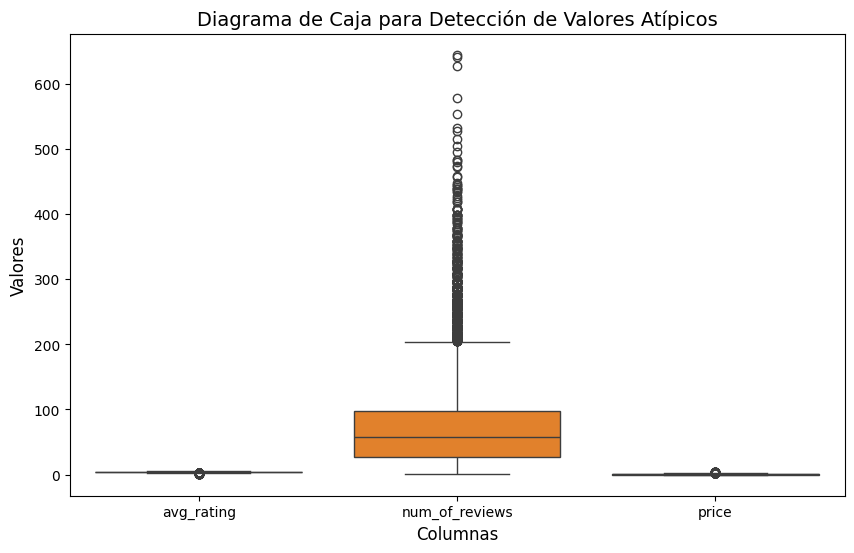

In [52]:
# Graficar un boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_filtrado)

# Etiquetas y título
plt.title('Diagrama de Caja para Detección de Valores Atípicos', fontsize=14)
plt.xlabel('Columnas', fontsize=12)
plt.ylabel('Valores', fontsize=12)

# Mostrar el gráfico
plt.show()

El gráfico revela que la mayoría de los elementos tienen calificaciones promedio y precios bajos. Sin embargo, hay una gran variación en el número de reseñas, con algunos elementos que tienen una cantidad excepcionalmente grande de reseñas. Esto podría indicar que algunos elementos son mucho más populares o notorios que otros.

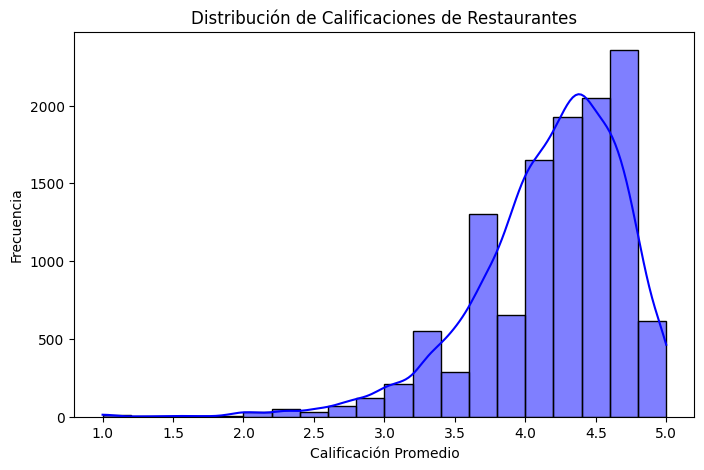

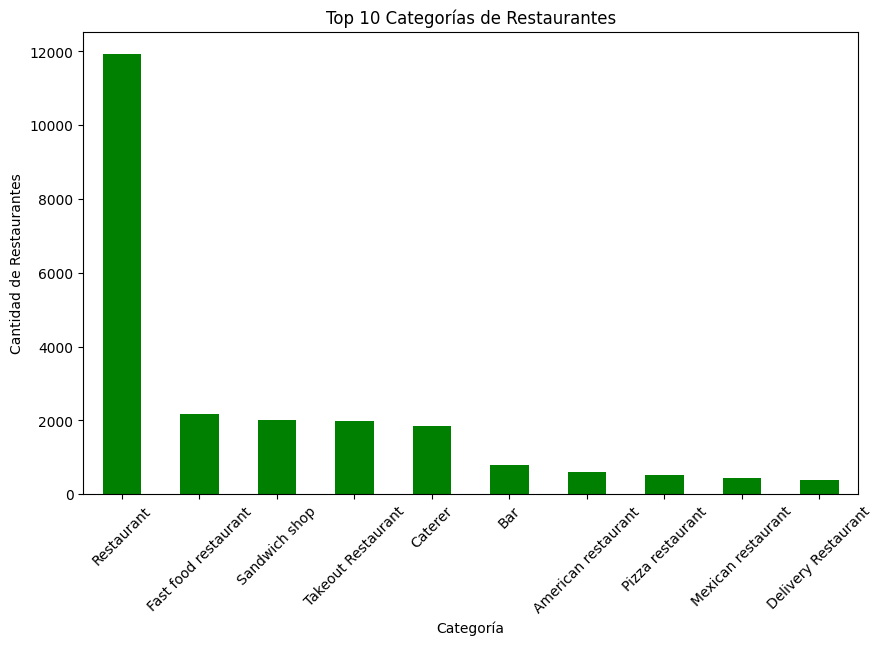

In [53]:

# Distribución de calificaciones
plt.figure(figsize=(8, 5))
sns.histplot(df_restaurants['avg_rating'].dropna(), bins=20, kde=True, color="blue")
plt.xlabel("Calificación Promedio")
plt.ylabel("Frecuencia")
plt.title("Distribución de Calificaciones de Restaurantes")
plt.show()
# Conteo de categorías de restaurantes
plt.figure(figsize=(10, 6))
df_restaurants['category'].explode().value_counts().head(10).plot(kind='bar', color="green")
plt.xlabel("Categoría")
plt.ylabel("Cantidad de Restaurantes")
plt.title("Top 10 Categorías de Restaurantes")
plt.xticks(rotation=45)
plt.show()



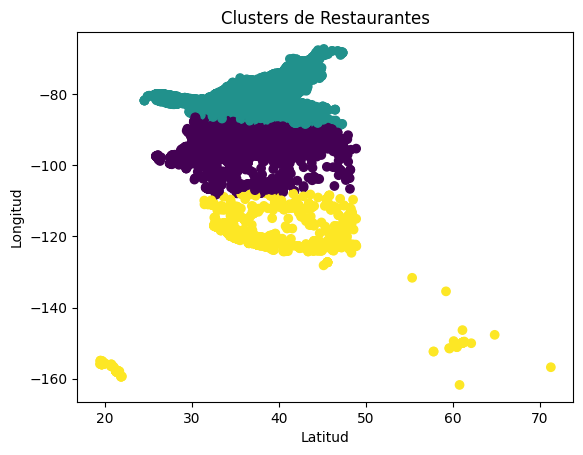

In [54]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Seleccionar columnas relevantes
df_cluster = df_restaurants[['latitude', 'longitude', 'price']]

# Realizar K-means (eligiendo 3 clusters como ejemplo)
kmeans = KMeans(n_clusters=3)
df_restaurants['cluster'] = kmeans.fit_predict(df_cluster)

# Graficar los clusters
plt.scatter(df_restaurants['latitude'], df_restaurants['longitude'], c=df_restaurants['cluster'], cmap='viridis')
plt.title('Clusters de Restaurantes')
plt.xlabel('Latitud')
plt.ylabel('Longitud')
plt.show()


El gráfico de dispersión muestra la distribución geográfica de los restaurantes y cómo se agrupan en diferentes clusters. Esta visualización puede ser útil para identificar áreas con alta concentración de restaurantes y para comprender mejor la distribución espacial de los restaurantes en relación con la latitud y longitud.

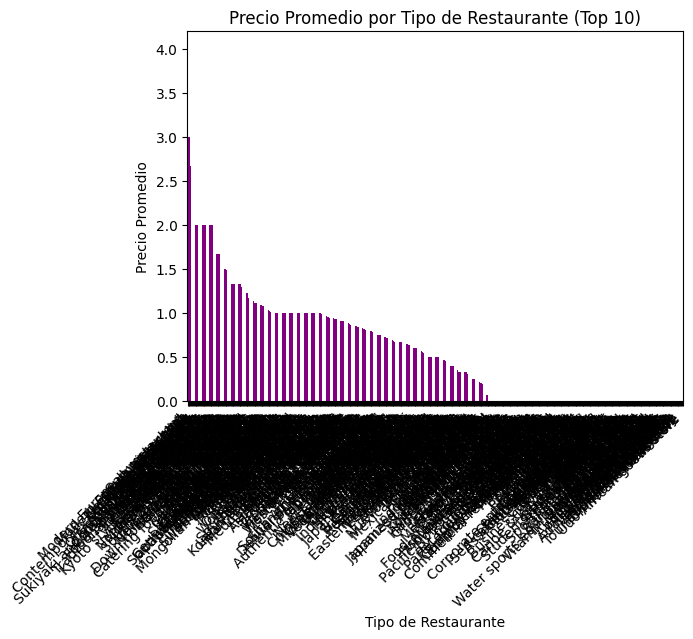

In [55]:
import matplotlib.pyplot as plt

# Asegurar que 'price' sea numérico, reemplazando NaN con 0
df_restaurants['price'] = pd.to_numeric(df_restaurants['price'], errors='coerce').fillna(0)

# Seleccionar la columna de categoría
columna_tipo = 'category' if 'category' in df_restaurants.columns else 'category'

# Contar cuántos restaurantes hay por categoría y seleccionar las top 10
top_categorias = df_restaurants[columna_tipo].explode().value_counts().head(10).index

# Filtrar solo las categorías más importantes
df_filtrado = df_restaurants[df_restaurants[columna_tipo].apply(lambda x: any(cat in top_categorias for cat in x))]

# Agrupar por categoría y calcular el precio promedio
precio_promedio = df_filtrado.explode(columna_tipo).groupby(columna_tipo)['price'].mean().sort_values(ascending=False)

# Graficar precio promedio por tipo de restaurante
precio_promedio.plot(kind='bar', color='purple')

# Personalizar gráfico
plt.title('Precio Promedio por Tipo de Restaurante (Top 10)')
plt.xlabel('Tipo de Restaurante')
plt.ylabel('Precio Promedio')
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas para mejor visualización
plt.show()


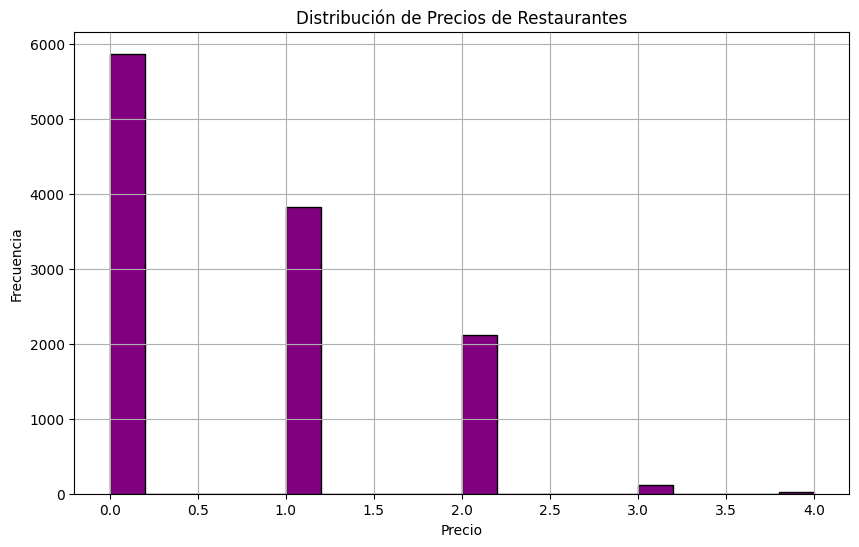

In [56]:
import matplotlib.pyplot as plt

# Histograma de la distribución de precios
plt.figure(figsize=(10, 6))
plt.hist(df_restaurants['price'], bins=20, color='purple', edgecolor='black')
plt.title('Distribución de Precios de Restaurantes')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


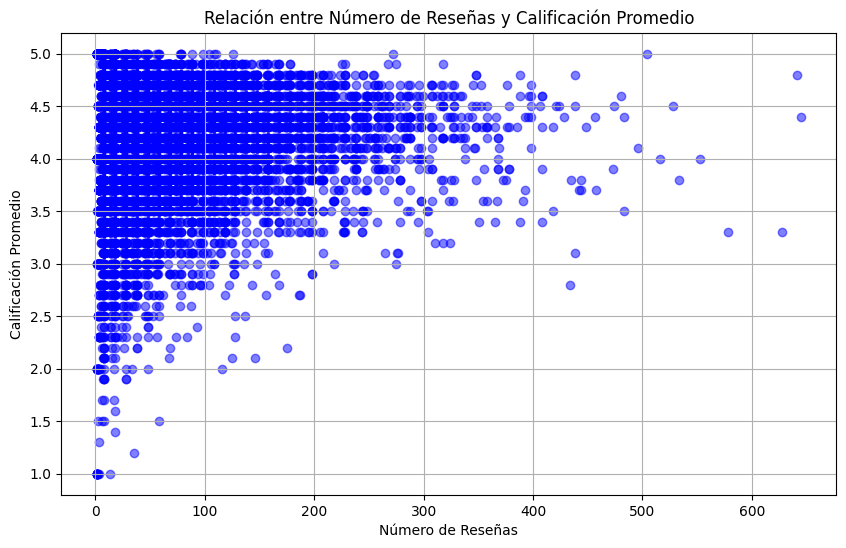

In [57]:
plt.figure(figsize=(10, 6))
plt.scatter(df_restaurants['num_of_reviews'], df_restaurants['avg_rating'], color='blue', alpha=0.5)
plt.title('Relación entre Número de Reseñas y Calificación Promedio')
plt.xlabel('Número de Reseñas')
plt.ylabel('Calificación Promedio')
plt.grid(True)
plt.show()


el gráfico de dispersión muestra que no hay una relación lineal fuerte entre el número de reseñas y la calificación promedio. Esto sugiere que la cantidad de reseñas no es un indicador confiable de la calidad de un restaurante. Sin embargo, la mayoría de los restaurantes tienen calificaciones promedio relativamente buenas, lo que indica que la calidad general de los restaurantes es alta.

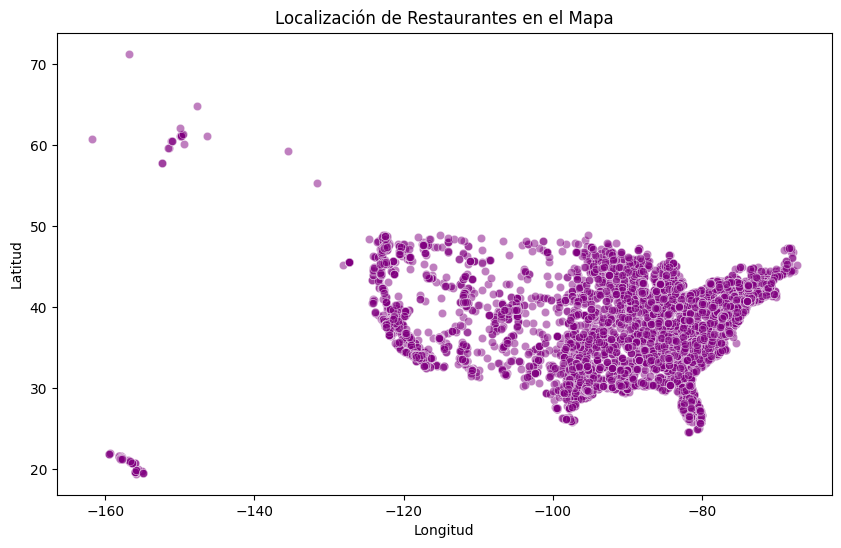

In [58]:
import seaborn as sns

# Gráfico de dispersión de latitud y longitud
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_restaurants, x='longitude', y='latitude', color='purple', alpha=0.5)
plt.title('Localización de Restaurantes en el Mapa')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()


l mapa de dispersión muestra la distribución geográfica de los restaurantes en los Estados Unidos, destacando la mayor concentración de restaurantes en la costa este y la menor concentración en otras áreas. Esta visualización puede ser útil para comprender mejor la distribución espacial de los restaurantes y para identificar patrones geográficos en la ubicación de los restaurantes.

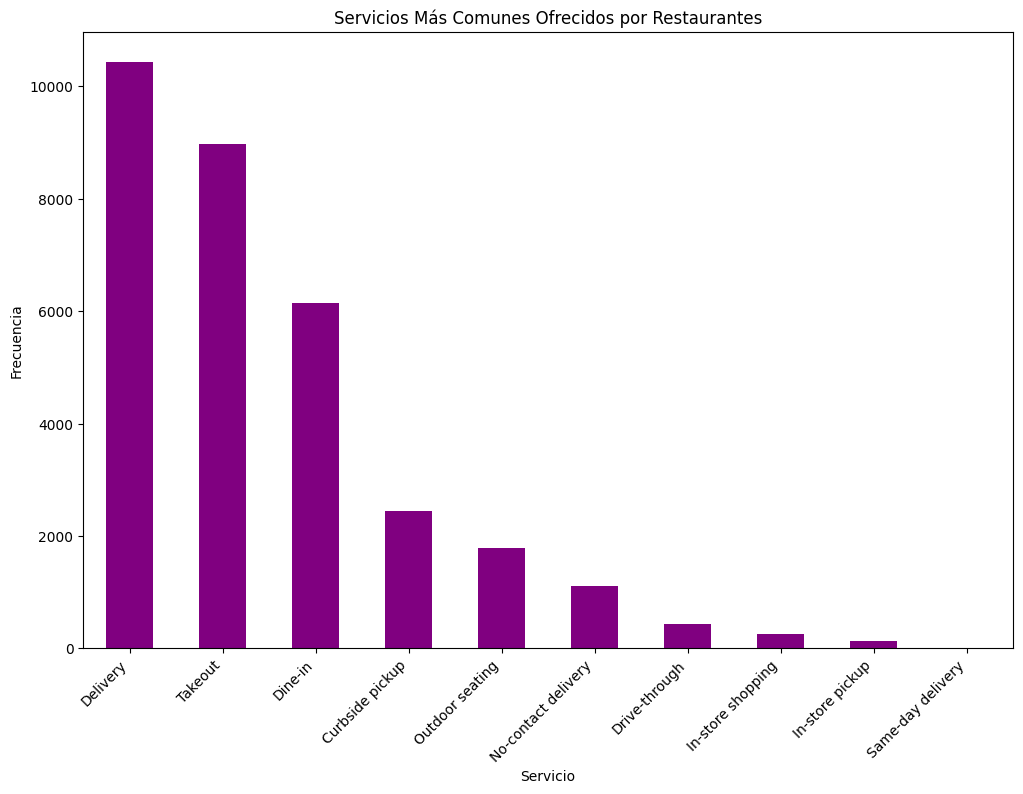

In [59]:
import json

# Filtrar las filas no vacías y luego aplicar json.loads solo en ellas
def safe_json_load(x):
    try:
        if isinstance(x, str) and x.strip():  # Verifica que x sea una cadena no vacía
            return json.loads(x)  # Intentar convertir
        return x  # Retorna el valor original si no es una cadena válida
    except json.JSONDecodeError:
        return x  # Retorna el valor original si no es un JSON válido

# Aplicar la función a la columna 'MISC'
df_restaurants['MISC'] = df_restaurants['MISC'].apply(safe_json_load)

# Ahora podemos proceder con el análisis
services = df_restaurants['MISC'].apply(lambda x: x.get('Service options', []) if isinstance(x, dict) else [])
service_counts = [service for sublist in services for service in sublist]
service_counts = pd.Series(service_counts).value_counts()

# Gráfico de barras de los servicios más comunes
plt.figure(figsize=(12, 8))
service_counts.head(10).plot(kind='bar', color='purple')
plt.title('Servicios Más Comunes Ofrecidos por Restaurantes')
plt.xlabel('Servicio')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.show()


el gráfico muestra claramente que los servicios de "Delivery" y "Takeout" son los más populares entre los restaurantes, lo que sugiere que estos servicios son muy demandados por los clientes. Los servicios de "In-store shopping", "In-store pickup" y "Same-day delivery" son mucho menos comunes, lo que indica que estos servicios no son tan populares entre los restaurantes o los clientes.

CONCLUSION:Distribución Geográfica: Los restaurantes tienden a agruparse en áreas geográficas específicas, lo que refleja patrones de población y densidad urbana. En el caso del mapa de Estados Unidos, se observa una mayor concentración en la costa este.
Popularidad de los Servicios: Los servicios de entrega a domicilio y comida para llevar ("Delivery" y "Takeout") son los más populares, lo que indica una fuerte demanda de conveniencia por parte de los clientes.
Relación Reseñas-Calificaciones: No existe una relación lineal fuerte entre el número de reseñas y la calificación promedio de los restaurantes. Esto sugiere que la cantidad de reseñas no es un indicador confiable de la calidad.
Calificaciones Promedio: La mayoría de los restaurantes tienen calificaciones promedio relativamente buenas, lo que indica un nivel general de calidad satisfactorio.
Variabilidad en Reseñas: El número de reseñas varía ampliamente, lo que refleja la popularidad y el alcance de diferentes restaurantes.

In [60]:
import os

# Verificar si la carpeta existe, y si no, crearla
carpeta_destino = r'C:\Users\yanin\OneDrive\Desktop\proyecto final\archivos\google\metadata-sitios-20250315T151227Z-002\metadata-sitios-modificado'
if not os.path.exists(carpeta_destino):
    os.makedirs(carpeta_destino)

# Guardar el archivo CSV en la carpeta
df_restaurants.to_csv(os.path.join(carpeta_destino, '10.csv'), index=False)

print("\nAnálisis completado y guardado en '10.csv'")



Análisis completado y guardado en '10.csv'


In [61]:
import json
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Ruta del archivo JSON
file_path = r"C:\Users\yanin\OneDrive\Desktop\proyecto final\archivos\google\metadata-sitios-20250315T151227Z-002\metadata-sitios\5.json"

# Intentar cargar el archivo JSON directamente
try:
    with open(file_path, "r", encoding="utf-8") as f:
        data = json.load(f)  # Si el archivo ya es un JSON válido, esto funcionará

except json.JSONDecodeError:
    print("⚠️ Error al cargar el JSON. Intentando corregir el formato...")

    # Si el archivo tiene líneas separadas como JSONL, corregirlo
    with open(file_path, "r", encoding="utf-8") as f:
        lines = f.readlines()
    
    # Envolver en corchetes y agregar comas entre líneas
    fixed_content = "[\n" + ",\n".join(line.strip() for line in lines if line.strip()) + "\n]"

    # Guardar el JSON corregido en un nuevo archivo
    file_fixed_path = file_path.replace(".json", "_fixed.json")
    with open(file_fixed_path, "w", encoding="utf-8") as f:
        f.write(fixed_content)
    
    # Volver a intentar cargar el JSON corregido
    with open(file_fixed_path, "r", encoding="utf-8") as f:
        data = json.load(f)
    
    print(f"✅ Archivo corregido guardado en: {file_fixed_path}")

# Convertir los datos a un DataFrame de pandas
df = pd.DataFrame(data)

# Filtrar solo los restaurantes
df_restaurants = df[df['category'].apply(lambda x: 'Restaurant' in x if isinstance(x, list) else False)]

# Convertir las listas en tuplas para poder detectar duplicados
df_restaurants['category'] = df_restaurants['category'].apply(tuple)

# Ver las primeras filas
print(df_restaurants.head())

# Guardar el DataFrame filtrado en un CSV
df_restaurants.to_csv("restaurantes_filtrados.csv", index=False)


⚠️ Error al cargar el JSON. Intentando corregir el formato...
✅ Archivo corregido guardado en: C:\Users\yanin\OneDrive\Desktop\proyecto final\archivos\google\metadata-sitios-20250315T151227Z-002\metadata-sitios\5_fixed.json


C:\Users\yanin\AppData\Local\Temp\ipykernel_19040\2492946552.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_restaurants['category'] = df_restaurants['category'].apply(tuple)


                                   name  \
20             Mariscos El Sanignacense   
55                    Tia's Chicken Box   
64                    La Casa de Esther   
70                       Weston Station   
224  South Mississippi Crawfish Company   

                                               address  \
20   Mariscos El Sanignacense, 2561 El Camino Real,...   
55   Tia's Chicken Box, 1233 E Grove Ave, Rantoul, ...   
64   La Casa de Esther, 1606 Sisk Rd, Modesto, CA 9...   
70   Weston Station, 4417 County Rd 82 SE, Alexandr...   
224  South Mississippi Crawfish Company, 5032 Old H...   

                                   gmap_id description   latitude   longitude  \
20   0x808fa33d3ca9e3cf:0x6e8dd6a3b535b10b        None  37.473253 -122.216881   
55   0x880d1f036c2f3dd1:0x94148d55341ec331        None  40.312384  -88.137844   
64   0x809051d29b2e903d:0xd8e45256be12e285        None  37.668091 -121.032874   
70   0x52ca118441c6216d:0x5569ecb8834186ad        None  45.886129  -

In [62]:
import pandas as pd
import ast  # Para convertir strings en listas/diccionarios
# Función para convertir listas en cadenas y diccionarios en JSON
def convertir_valor(x):
    if isinstance(x, dict):
        return json.dumps(x)  # Convertir diccionarios a JSON string
    elif isinstance(x, list):
        return ", ".join(map(str, x))  # Convertir cada elemento de la lista a string y unir con coma
    else:
        return x  # Mantener otros valores sin cambios

# Aplicar la función a todas las columnas del DataFrame
df_restaurants = df_restaurants.applymap(convertir_valor)


print(df_restaurants[['price']].head(10))  
# Mapeo de precios en base a la cantidad de símbolos $
price_mapping = {'$': 1, '$$': 2, '$$$': 3, '$$$$': 4}

def convert_price(value):
    """Convierte el precio en número basado en la cantidad de $"""
    return price_mapping.get(value.strip(), 0)  # Si el valor no está en el diccionario, devuelve 0

# Asegurar que las columnas tengan el tipo correcto
df_restaurants['name'] = df_restaurants['name'].astype(str)
df_restaurants['address'] = df_restaurants['address'].astype(str)
df_restaurants['gmap_id'] = df_restaurants['gmap_id'].astype(str)
df_restaurants['description'] = df_restaurants['description'].astype(str)
df_restaurants['state'] = df_restaurants['state'].astype(str)
df_restaurants['url'] = df_restaurants['url'].astype(str)

df_restaurants['latitude'] = df_restaurants['latitude'].astype(float)
df_restaurants['longitude'] = df_restaurants['longitude'].astype(float)
df_restaurants['avg_rating'] = df_restaurants['avg_rating'].astype(float)

# Evitar errores con valores nulos en num_of_reviews
df_restaurants['num_of_reviews'] = df_restaurants['num_of_reviews'].fillna(0).astype(int)

# Convertir price a número
df_restaurants['price'] = df_restaurants['price'].astype(str).apply(convert_price)

# Verificar cambios
#rint(df_restaurants.dtypes)
#print(df_restaurants[['price']].head(10))  # Verificar valores convertidos

    price
20   None
55   None
64   None
70     $$
224  None
284  None
389  None
412     $
436  None
437    $$


C:\Users\yanin\AppData\Local\Temp\ipykernel_19040\1664295562.py:13: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_restaurants = df_restaurants.applymap(convertir_valor)


In [63]:
#  **Tipos de datos**
print("\n Tipos de datos en el dataset:")
print(df_restaurants.dtypes)
#  **Duplicados**
duplicados = df_restaurants.duplicated().sum()
print(f"🔍 Duplicados en el dataset: {duplicados}")
# Calcular valores faltantes
faltantes = df_restaurants.isnull().sum()
total_filas = len(df_restaurants)

# Calcular porcentaje de valores nulos
porcentaje_faltantes = (faltantes / total_filas) * 100

# Filtrar solo columnas con valores faltantes
faltantes_df = pd.DataFrame({'Valores Faltantes': faltantes, 'Porcentaje (%)': porcentaje_faltantes})
faltantes_df = faltantes_df[faltantes_df['Valores Faltantes'] > 0]

# Mostrar resultados
print("\nValores faltantes por columna:")
print(faltantes_df)



 Tipos de datos en el dataset:
name                 object
address              object
gmap_id              object
description          object
latitude            float64
longitude           float64
category             object
avg_rating          float64
num_of_reviews        int64
price                 int64
hours                object
MISC                 object
state                object
relative_results     object
url                  object
dtype: object
🔍 Duplicados en el dataset: 0

Valores faltantes por columna:
                  Valores Faltantes  Porcentaje (%)
hours                          1104       16.676737
MISC                             40        0.604230
relative_results               1813       27.386707


In [64]:
df_restaurants['address'] = df_restaurants['address'].fillna("No disponible")
df_restaurants['description'] = df_restaurants['description'].fillna("Sin descripción")
df_restaurants['hours'] = df_restaurants['hours'].fillna("Sin horarios")
df_restaurants['MISC'] = df_restaurants['MISC'].fillna("No disponible")
df_restaurants['state'] = df_restaurants['state'].fillna("Desconocido")
df_restaurants['price'] = df_restaurants['price'].fillna(0)
df_restaurants['relative_results'] = df_restaurants['relative_results'].fillna("0")
#  **Resumen general**
print("\n Resumen del dataset:")
print(df_restaurants.info())



 Resumen del dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 6620 entries, 20 to 274845
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              6620 non-null   object 
 1   address           6620 non-null   object 
 2   gmap_id           6620 non-null   object 
 3   description       6620 non-null   object 
 4   latitude          6620 non-null   float64
 5   longitude         6620 non-null   float64
 6   category          6620 non-null   object 
 7   avg_rating        6620 non-null   float64
 8   num_of_reviews    6620 non-null   int64  
 9   price             6620 non-null   int64  
 10  hours             6620 non-null   object 
 11  MISC              6620 non-null   object 
 12  state             6620 non-null   object 
 13  relative_results  6620 non-null   object 
 14  url               6620 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 827.5+ KB
None


In [65]:
# Resumen estadístico para las columnas numéricas
print("\nResumen estadístico de columnas numéricas:")
print(df_restaurants.describe())

# Resumen estadístico para las columnas categóricas
print("\nResumen estadístico de columnas categóricas:")
print(df_restaurants.describe(include='object'))



Resumen estadístico de columnas numéricas:
          latitude    longitude   avg_rating  num_of_reviews        price
count  6620.000000  6620.000000  6620.000000     6620.000000  6620.000000
mean     37.331307   -92.167098     4.134486       31.461782     0.515861
std       5.382575    16.745121     0.661797       33.382521     0.768520
min      19.690908  -165.400323     1.000000        1.000000     0.000000
25%      33.753252   -98.573210     3.800000        8.000000     0.000000
50%      38.045849   -87.724102     4.300000       24.000000     0.000000
75%      41.150516   -79.945611     4.600000       45.000000     1.000000
max      64.825251   -67.276567     5.000000      816.000000     4.000000

Resumen estadístico de columnas categóricas:
          name                                            address  \
count     6620                                               6620   
unique    5459                                               6620   
top     Subway  Subway, 2675 Geary Bl

In [66]:
# Excluir las columnas 'latitud' y 'longitud' del DataFrame
df_filtrado = df_restaurants.drop(columns=['latitude', 'longitude'])
# Filtrar solo las columnas numéricas
df_numeric = df_filtrado.select_dtypes(include=[np.number])

# Calcular los percentiles 25 (Q1) y 75 (Q3) para cada columna numérica
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)

# Calcular el rango intercuartílico (IQR)
IQR = Q3 - Q1

# Calcular los límites inferior y superior para detectar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Detectar los valores atípicos en cada columna numérica
outliers = (df_numeric < limite_inferior) | (df_numeric > limite_superior)

# Mostrar el número de outliers por columna
print("\nNúmero de valores atípicos por columna:")
print(outliers.sum())

# Si deseas ver los valores atípicos específicos
print("\nValores atípicos encontrados:")
print(df_numeric[outliers.any(axis=1)])


Número de valores atípicos por columna:
avg_rating        196
num_of_reviews    216
price              51
dtype: int64

Valores atípicos encontrados:
        avg_rating  num_of_reviews  price
412            3.6             118      1
436            4.4             118      0
1432           4.3             128      0
3429           4.5             196      1
4039           4.2              15      3
...            ...             ...    ...
272409         4.2             125      0
272436         4.3             118      1
272794         4.3             125      1
272891         4.2             168      1
273555         4.2             108      0

[459 rows x 3 columns]


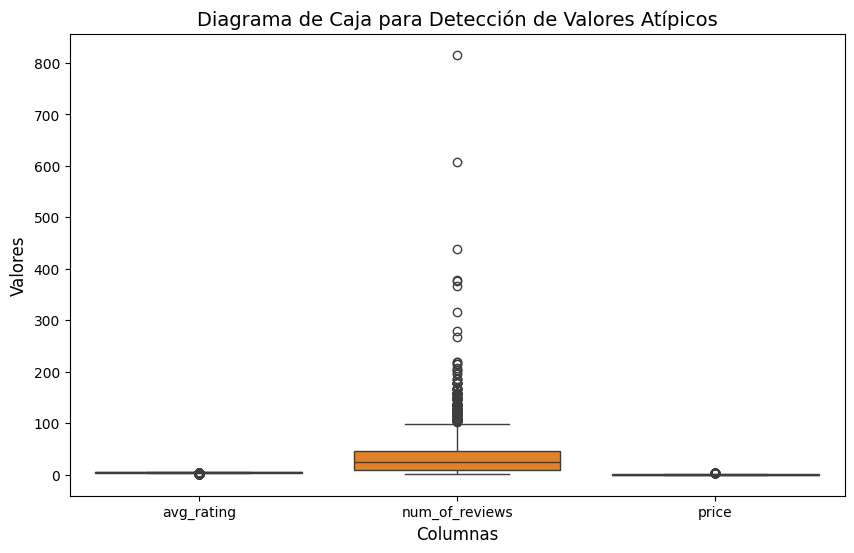

In [67]:
# Graficar un boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_filtrado)

# Etiquetas y título
plt.title('Diagrama de Caja para Detección de Valores Atípicos', fontsize=14)
plt.xlabel('Columnas', fontsize=12)
plt.ylabel('Valores', fontsize=12)

# Mostrar el gráfico
plt.show()

Presencia de Valores Atípicos: El gráfico muestra claramente la presencia de valores atípicos en los datos, particularmente en la columna del medio. Estos valores atípicos pueden indicar errores en los datos, datos inusuales o puntos de datos que merecen una atención especial.
Distribución de los Datos: La forma de las cajas y la longitud de los bigotes nos dan una idea de la distribución de los datos para cada columna. Por ejemplo, la columna de la izquierda y la de la derecha tienen cajas muy pequeñas, lo que sugiere que los datos en esas columnas están muy concentrados alrededor de la mediana

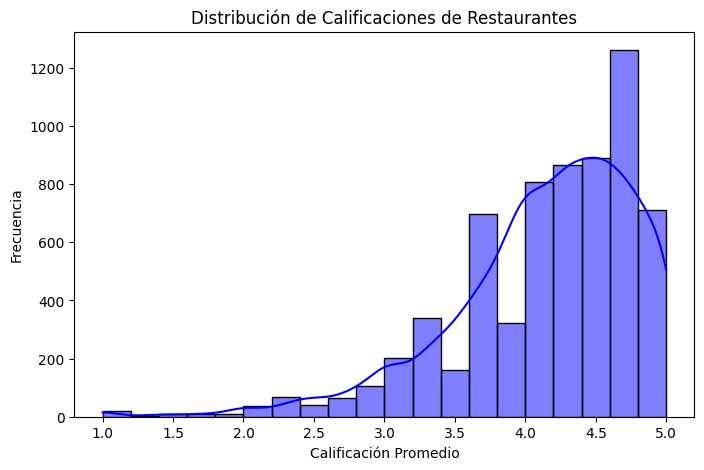

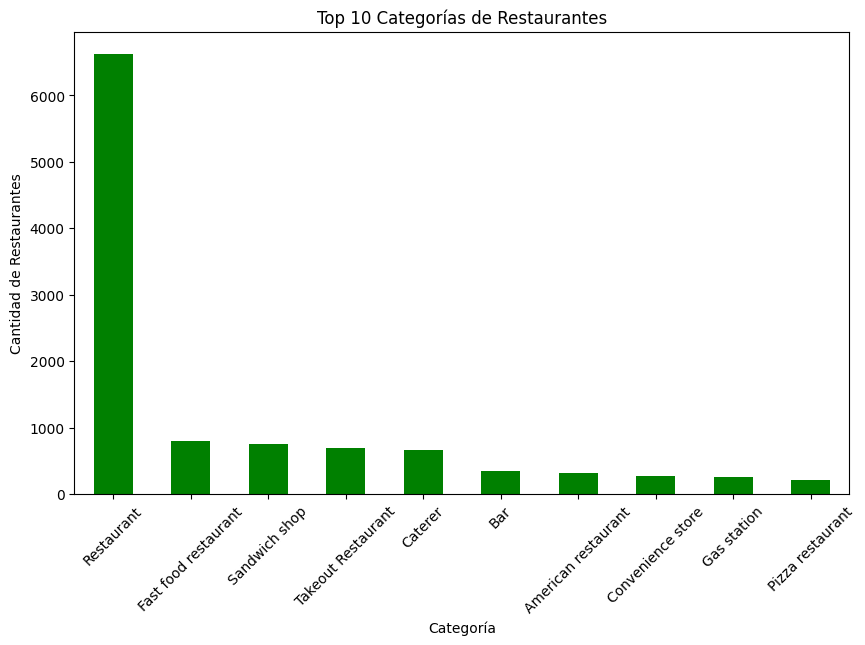

In [68]:

# Distribución de calificaciones
plt.figure(figsize=(8, 5))
sns.histplot(df_restaurants['avg_rating'].dropna(), bins=20, kde=True, color="blue")
plt.xlabel("Calificación Promedio")
plt.ylabel("Frecuencia")
plt.title("Distribución de Calificaciones de Restaurantes")
plt.show()
# Conteo de categorías de restaurantes
plt.figure(figsize=(10, 6))
df_restaurants['category'].explode().value_counts().head(10).plot(kind='bar', color="green")
plt.xlabel("Categoría")
plt.ylabel("Cantidad de Restaurantes")
plt.title("Top 10 Categorías de Restaurantes")
plt.xticks(rotation=45)
plt.show()


Distribución: El histograma muestra la distribución de las calificaciones promedio de los restaurantes. Podemos observar que la distribución está sesgada hacia la derecha, lo que significa que hay más restaurantes con calificaciones más altas.
Moda: La barra más alta del histograma se encuentra en la calificación de 5.0, lo que indica que esta es la calificación más común entre los restaurantes.
Curva de Densidad: La curva azul que se superpone al histograma representa la estimación de la densidad de probabilidad de los datos. Nos ayuda a visualizar la forma general de la distribución.
Sesgo: Como mencionamos anteriormente, la distribución está sesgada hacia la derecha. La cola derecha de la distribución es más larga, lo que indica que hay algunos restaurantes con calificaciones excepcionalmente altas.
Valores Atípicos: No se observan valores atípicos evidentes en el histograma.

Dominio de la Categoría "Restaurant": La barra más alta corresponde a la categoría "Restaurant", lo que indica que esta es la categoría con la mayor cantidad de establecimientos. Hay una diferencia significativa en la cantidad de restaurantes en esta categoría en comparación con las demás.
Categorías con Menor Cantidad: Las categorías "Gas station" y "Pizza restaurant" tienen las barras más bajas, lo que significa que tienen la menor cantidad de establecimientos.
Distribución Desigual: La distribución de la cantidad de restaurantes por categoría es muy desigual. Hay una gran diferencia entre la categoría "Restaurant" y las demás categorías.

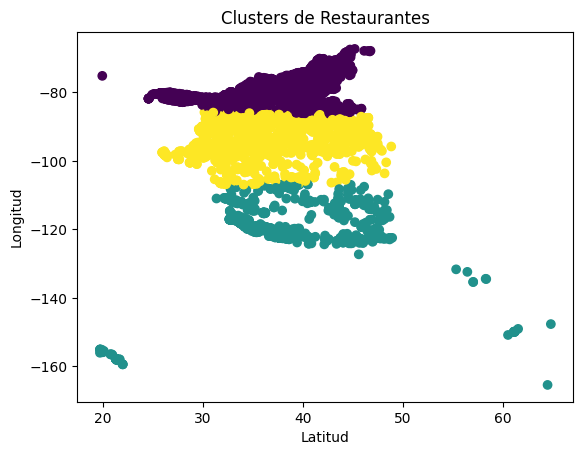

In [69]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Seleccionar columnas relevantes
df_cluster = df_restaurants[['latitude', 'longitude', 'price']]

# Realizar K-means (eligiendo 3 clusters como ejemplo)
kmeans = KMeans(n_clusters=3)
df_restaurants['cluster'] = kmeans.fit_predict(df_cluster)

# Graficar los clusters
plt.scatter(df_restaurants['latitude'], df_restaurants['longitude'], c=df_restaurants['cluster'], cmap='viridis')
plt.title('Clusters de Restaurantes')
plt.xlabel('Latitud')
plt.ylabel('Longitud')
plt.show()


sters: El gráfico muestra claramente tres clusters o grupos distintos de restaurantes, representados por colores diferentes (azul, amarillo y morado). Esto sugiere que se ha aplicado algún algoritmo de clustering (como K-means) para agrupar los restaurantes según su ubicación geográfica (latitud y longitud).
Dispersión: La dispersión de los puntos dentro de cada cluster varía. El cluster azul parece estar más disperso, mientras que los clusters amarillo y morado son más compactos.
Valores Atípicos: Hay algunos puntos morados que se encuentran bastante alejados del cluster principal morado, lo que podría indicar valores atípicos o restaurantes ubicados en áreas geográficas aisladas.
Relación Geográfica: El gráfico representa la distribución geográfica de los restaurantes, lo que nos permite visualizar cómo se agrupan en diferentes áreas.

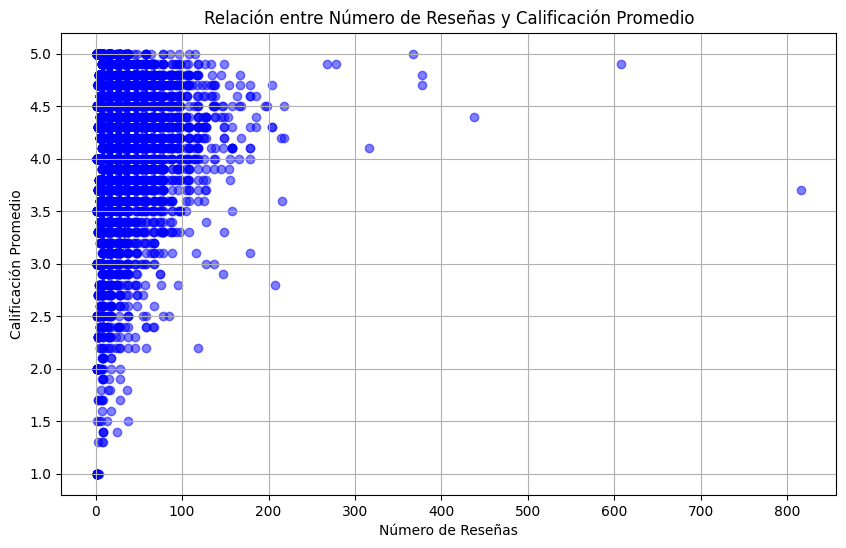

In [70]:
plt.figure(figsize=(10, 6))
plt.scatter(df_restaurants['num_of_reviews'], df_restaurants['avg_rating'], color='blue', alpha=0.5)
plt.title('Relación entre Número de Reseñas y Calificación Promedio')
plt.xlabel('Número de Reseñas')
plt.ylabel('Calificación Promedio')
plt.grid(True)
plt.show()


Relación: El gráfico muestra la relación entre el número de reseñas que recibe un restaurante y su calificación promedio. Podemos observar que hay una dispersión considerable de puntos, lo que sugiere que la relación no es lineal ni muy fuerte.
Tendencia: Aunque la relación no es perfecta, parece haber una ligera tendencia positiva. Es decir, los restaurantes con un mayor número de reseñas tienden a tener calificaciones promedio ligeramente más altas. Sin embargo, hay muchos restaurantes con pocas reseñas que también tienen calificaciones altas.
Dispersión en Calificaciones Bajas: Se observa una mayor dispersión de puntos en el rango de calificaciones bajas (1.0 a 3.5), lo que indica que hay restaurantes con pocas y muchas reseñas en este rango.
Concentración en Calificaciones Altas: En el rango de calificaciones altas (4.0 a 5.0), los puntos tienden a concentrarse más, lo que sugiere que los restaurantes con muchas reseñas suelen tener calificaciones altas.

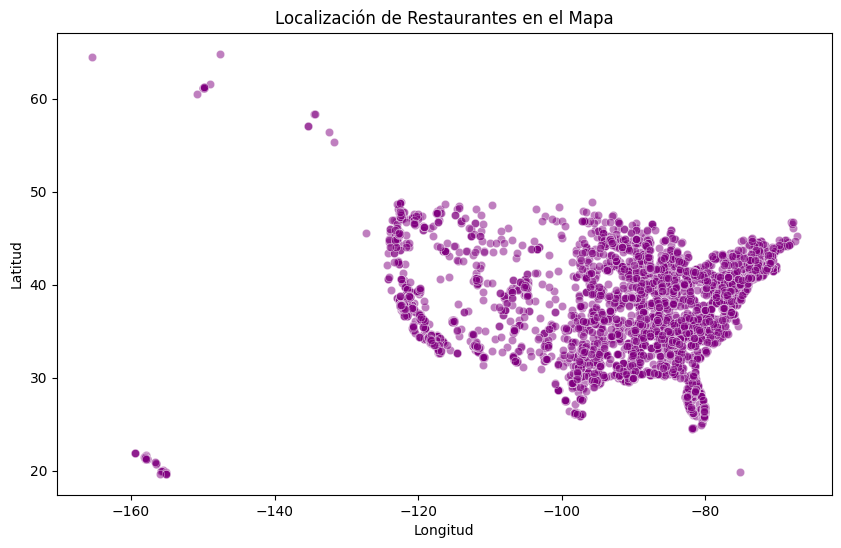

In [71]:
import seaborn as sns

# Gráfico de dispersión de latitud y longitud
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_restaurants, x='longitude', y='latitude', color='purple', alpha=0.5)
plt.title('Localización de Restaurantes en el Mapa')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()


Concentración en la Costa Este: La mayoría de los restaurantes se concentran en la costa este de los Estados Unidos, lo que podría deberse a una mayor densidad de población, actividad económica o desarrollo urbano en esta región.
Menor Densidad en el Oeste: La densidad de restaurantes disminuye hacia el oeste, lo que podría reflejar una menor densidad de población o un desarrollo urbano diferente en esta parte del país.
Posibles Valores Atípicos: Los puntos dispersos fuera del contorno principal podrían ser valores atípicos que merecen una investigación adicional para determinar si son errores o si representan restaurantes en ubicaciones inusuales.
Visualización Efectiva: El gráfico proporciona una visualización efectiva de la distribución geográfica de los restaurantes y permite identificar patrones y tendencias espaciales.

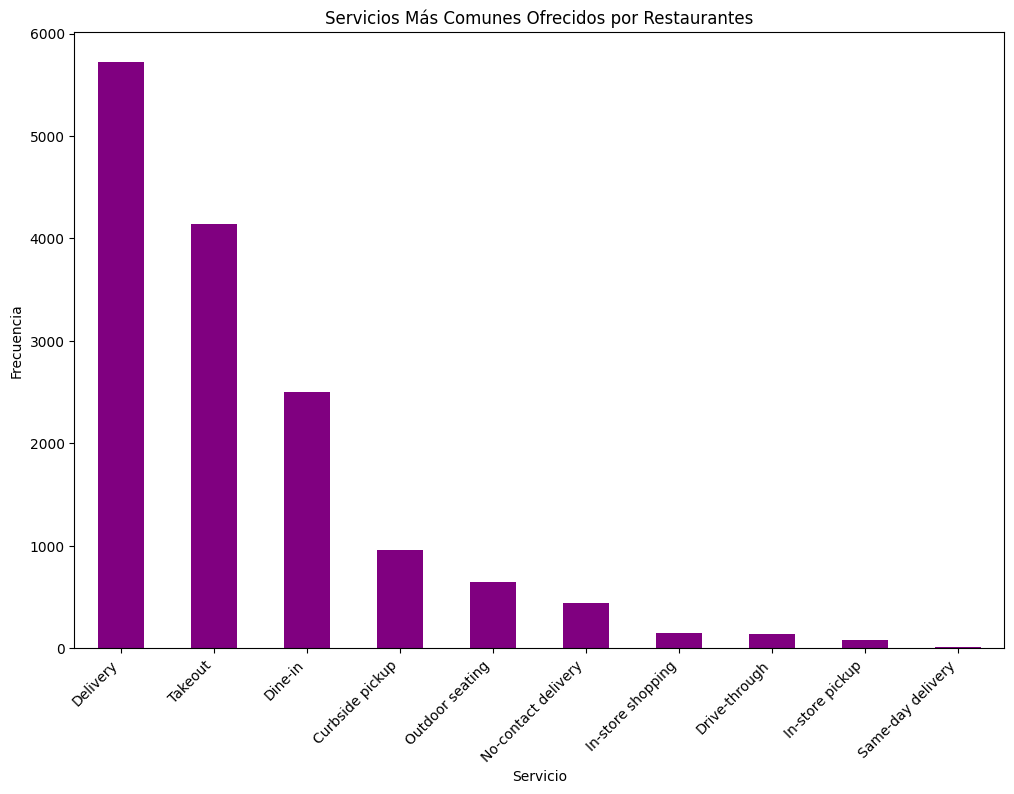

In [72]:
import json

# Filtrar las filas no vacías y luego aplicar json.loads solo en ellas
def safe_json_load(x):
    try:
        if isinstance(x, str) and x.strip():  # Verifica que x sea una cadena no vacía
            return json.loads(x)  # Intentar convertir
        return x  # Retorna el valor original si no es una cadena válida
    except json.JSONDecodeError:
        return x  # Retorna el valor original si no es un JSON válido

# Aplicar la función a la columna 'MISC'
df_restaurants['MISC'] = df_restaurants['MISC'].apply(safe_json_load)

# Ahora podemos proceder con el análisis
services = df_restaurants['MISC'].apply(lambda x: x.get('Service options', []) if isinstance(x, dict) else [])
service_counts = [service for sublist in services for service in sublist]
service_counts = pd.Series(service_counts).value_counts()

# Gráfico de barras de los servicios más comunes
plt.figure(figsize=(12, 8))
service_counts.head(10).plot(kind='bar', color='purple')
plt.title('Servicios Más Comunes Ofrecidos por Restaurantes')
plt.xlabel('Servicio')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.show()


Servicios Más Comunes: Los servicios más comunes ofrecidos por los restaurantes son "delivery", "takeout" y "dine-in".
Servicios Menos Comunes: Los servicios menos comunes son los que están representados por las barras más cortas. Debido a la truncación de las palabras, no puedo identificar con certeza qué servicios son.

conclusion:Ubicación Geográfica:
Los restaurantes tienden a concentrarse en la costa este de los Estados Unidos, lo que podría deberse a una mayor densidad de población y actividad económica en esta región.
La distribución geográfica de los restaurantes muestra patrones de agrupación (clusters), lo que indica áreas de alta concentración de restaurantes.
Relación entre Reseñas y Calificaciones:
Existe una relación débil pero positiva entre el número de reseñas y la calificación promedio. Los restaurantes con más reseñas tienden a tener calificaciones ligeramente más altas.
La popularidad de un restaurante (medida por el número de reseñas) puede influir en su calificación promedio.
Servicios Ofrecidos:
Los servicios más comunes ofrecidos por los restaurantes son la entrega a domicilio ("delivery"), la comida para llevar ("takeout") y la comida en el local ("dine-in").
Existe una gran diferencia en la popularidad de los diferentes servicios.
Valores Atípicos:
Se detectaron valores atípicos en varios gráficos, lo que indica la necesidad de investigar y comprender estos puntos de datos inusuales.


In [73]:
import os

# Verificar si la carpeta existe, y si no, crearla
carpeta_destino = r'C:\Users\yanin\OneDrive\Desktop\proyecto final\archivos\google\metadata-sitios-20250315T151227Z-002\metadata-sitios-modificado'
if not os.path.exists(carpeta_destino):
    os.makedirs(carpeta_destino)

# Guardar el archivo CSV en la carpeta
df_restaurants.to_csv(os.path.join(carpeta_destino, '10.csv'), index=False)

print("\nAnálisis completado y guardado en '5.csv'")


Análisis completado y guardado en '5.csv'


In [74]:
import json
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Ruta del archivo JSON
file_path = r"C:\Users\yanin\OneDrive\Desktop\proyecto final\archivos\google\metadata-sitios-20250315T151227Z-002\metadata-sitios\8.json"

# Intentar cargar el archivo JSON directamente
try:
    with open(file_path, "r", encoding="utf-8") as f:
        data = json.load(f)  # Si el archivo ya es un JSON válido, esto funcionará

except json.JSONDecodeError:
    print("⚠️ Error al cargar el JSON. Intentando corregir el formato...")

    # Si el archivo tiene líneas separadas como JSONL, corregirlo
    with open(file_path, "r", encoding="utf-8") as f:
        lines = f.readlines()
    
    # Envolver en corchetes y agregar comas entre líneas
    fixed_content = "[\n" + ",\n".join(line.strip() for line in lines if line.strip()) + "\n]"

    # Guardar el JSON corregido en un nuevo archivo
    file_fixed_path = file_path.replace(".json", "_fixed.json")
    with open(file_fixed_path, "w", encoding="utf-8") as f:
        f.write(fixed_content)
    
    # Volver a intentar cargar el JSON corregido
    with open(file_fixed_path, "r", encoding="utf-8") as f:
        data = json.load(f)
    
    print(f"✅ Archivo corregido guardado en: {file_fixed_path}")

# Convertir los datos a un DataFrame de pandas
df = pd.DataFrame(data)

# Filtrar solo los restaurantes
df_restaurants = df[df['category'].apply(lambda x: 'Restaurant' in x if isinstance(x, list) else False)]

# Convertir las listas en tuplas para poder detectar duplicados
df_restaurants['category'] = df_restaurants['category'].apply(tuple)

# Ver las primeras filas
print(df_restaurants.head())

# Guardar el DataFrame filtrado en un CSV
df_restaurants.to_csv("restaurantes_filtrados.csv", index=False)


⚠️ Error al cargar el JSON. Intentando corregir el formato...
✅ Archivo corregido guardado en: C:\Users\yanin\OneDrive\Desktop\proyecto final\archivos\google\metadata-sitios-20250315T151227Z-002\metadata-sitios\8_fixed.json


C:\Users\yanin\AppData\Local\Temp\ipykernel_19040\4239389005.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_restaurants['category'] = df_restaurants['category'].apply(tuple)


                         name  \
2   Teppanyaki & Sushi Buffet   
5                Thai Kitchen   
20   Vora Restaurant European   
24              Jonny Chongas   
33             There on Fifth   

                                              address  \
2   Teppanyaki & Sushi Buffet, 6710 W Kellogg Dr, ...   
5   Thai Kitchen, 3103 S Fort Hood St # A, Killeen...   
20  Vora Restaurant European, 3252 E Douglas Ave, ...   
24  Jonny Chongas, 2083 N Powerline Rd, Pompano Be...   
33    There on Fifth, 22 5th St NW, Atlanta, GA 30308   

                                  gmap_id  \
2   0x87bae0c50d626c33:0xbfec787e2fc75206   
5   0x86454b10b9e801b3:0x54f13ee72d05d260   
20  0x87bae3ad74952257:0xd768cd5a2dbea667   
24  0x88d903256bdb0abd:0xac83fa05b32883a0   
33  0x88f50582974dd961:0xc965fccb8eaaa235   

                                          description   latitude  longitude  \
2   Restaurant featuring a buffet with sushi & oth...  37.674919 -97.420456   
5                            

In [75]:
import pandas as pd
import ast  # Para convertir strings en listas/diccionarios
# Función para convertir listas en cadenas y diccionarios en JSON
def convertir_valor(x):
    if isinstance(x, dict):
        return json.dumps(x)  # Convertir diccionarios a JSON string
    elif isinstance(x, list):
        return ", ".join(map(str, x))  # Convertir cada elemento de la lista a string y unir con coma
    else:
        return x  # Mantener otros valores sin cambios

# Aplicar la función a todas las columnas del DataFrame
df_restaurants = df_restaurants.applymap(convertir_valor)


print(df_restaurants[['price']].head(10))  
# Mapeo de precios en base a la cantidad de símbolos $
price_mapping = {'$': 1, '$$': 2, '$$$': 3, '$$$$': 4}

def convert_price(value):
    """Convierte el precio en número basado en la cantidad de $"""
    return price_mapping.get(value.strip(), 0)  # Si el valor no está en el diccionario, devuelve 0

# Asegurar que las columnas tengan el tipo correcto
df_restaurants['name'] = df_restaurants['name'].astype(str)
df_restaurants['address'] = df_restaurants['address'].astype(str)
df_restaurants['gmap_id'] = df_restaurants['gmap_id'].astype(str)
df_restaurants['description'] = df_restaurants['description'].astype(str)
df_restaurants['state'] = df_restaurants['state'].astype(str)
df_restaurants['url'] = df_restaurants['url'].astype(str)

df_restaurants['latitude'] = df_restaurants['latitude'].astype(float)
df_restaurants['longitude'] = df_restaurants['longitude'].astype(float)
df_restaurants['avg_rating'] = df_restaurants['avg_rating'].astype(float)

# Evitar errores con valores nulos en num_of_reviews
df_restaurants['num_of_reviews'] = df_restaurants['num_of_reviews'].fillna(0).astype(int)

# Convertir price a número
df_restaurants['price'] = df_restaurants['price'].astype(str).apply(convert_price)

# Verificar cambios
#rint(df_restaurants.dtypes)
#print(df_restaurants[['price']].head(10))  # Verificar valores convertidos

C:\Users\yanin\AppData\Local\Temp\ipykernel_19040\1664295562.py:13: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_restaurants = df_restaurants.applymap(convertir_valor)


   price
2     $$
5   None
20  None
24     $
33    $$
34    $$
36  None
44  None
46  None
47  None


In [76]:
#  **Tipos de datos**
print("\n Tipos de datos en el dataset:")
print(df_restaurants.dtypes)
#  **Duplicados**
duplicados = df_restaurants.duplicated().sum()
print(f"🔍 Duplicados en el dataset: {duplicados}")
# Calcular valores faltantes
faltantes = df_restaurants.isnull().sum()
total_filas = len(df_restaurants)

# Calcular porcentaje de valores nulos
porcentaje_faltantes = (faltantes / total_filas) * 100

# Filtrar solo columnas con valores faltantes
faltantes_df = pd.DataFrame({'Valores Faltantes': faltantes, 'Porcentaje (%)': porcentaje_faltantes})
faltantes_df = faltantes_df[faltantes_df['Valores Faltantes'] > 0]

# Mostrar resultados
print("\nValores faltantes por columna:")
print(faltantes_df)


 Tipos de datos en el dataset:
name                 object
address              object
gmap_id              object
description          object
latitude            float64
longitude           float64
category             object
avg_rating          float64
num_of_reviews        int64
price                 int64
hours                object
MISC                 object
state                object
relative_results     object
url                  object
dtype: object
🔍 Duplicados en el dataset: 0

Valores faltantes por columna:
                  Valores Faltantes  Porcentaje (%)
hours                          1149        8.147780
MISC                             64        0.453836
relative_results               2304       16.338108


In [77]:
df_restaurants['address'] = df_restaurants['address'].fillna("No disponible")
df_restaurants['description'] = df_restaurants['description'].fillna("Sin descripción")
df_restaurants['hours'] = df_restaurants['hours'].fillna("Sin horarios")
df_restaurants['MISC'] = df_restaurants['MISC'].fillna("No disponible")
df_restaurants['state'] = df_restaurants['state'].fillna("Desconocido")
df_restaurants['price'] = df_restaurants['price'].fillna(0)
df_restaurants['relative_results'] = df_restaurants['relative_results'].fillna("0")
#  **Resumen general**
print("\n Resumen del dataset:")
print(df_restaurants.info())



 Resumen del dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 14102 entries, 2 to 274980
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              14102 non-null  object 
 1   address           14102 non-null  object 
 2   gmap_id           14102 non-null  object 
 3   description       14102 non-null  object 
 4   latitude          14102 non-null  float64
 5   longitude         14102 non-null  float64
 6   category          14102 non-null  object 
 7   avg_rating        14102 non-null  float64
 8   num_of_reviews    14102 non-null  int64  
 9   price             14102 non-null  int64  
 10  hours             14102 non-null  object 
 11  MISC              14102 non-null  object 
 12  state             14102 non-null  object 
 13  relative_results  14102 non-null  object 
 14  url               14102 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 1.7+ MB
None


In [78]:
# Resumen estadístico para las columnas numéricas
print("\nResumen estadístico de columnas numéricas:")
print(df_restaurants.describe())

# Resumen estadístico para las columnas categóricas
print("\nResumen estadístico de columnas categóricas:")
print(df_restaurants.describe(include='object'))


Resumen estadístico de columnas numéricas:
           latitude     longitude    avg_rating  num_of_reviews         price
count  14102.000000  14102.000000  14102.000000    14102.000000  14102.000000
mean      36.999678    -92.488692      4.154595      411.740250      0.518721
std        5.404204     16.529183      0.532197      734.741208      0.760271
min       19.060045   -159.658111      1.000000        1.000000      0.000000
25%       33.391203    -99.714526      3.900000       28.000000      0.000000
50%       37.707600    -87.641794      4.300000       78.000000      0.000000
75%       41.000753    -80.199597      4.500000      568.000000      1.000000
max       64.854891    -67.220834      5.000000     9998.000000      4.000000

Resumen estadístico de columnas categóricas:
          name address                                gmap_id description  \
count    14102   14102                                  14102       14102   
unique    9854   14062                                

In [79]:
# Excluir las columnas 'latitud' y 'longitud' del DataFrame
df_filtrado = df_restaurants.drop(columns=['latitude', 'longitude'])
# Filtrar solo las columnas numéricas
df_numeric = df_filtrado.select_dtypes(include=[np.number])

# Calcular los percentiles 25 (Q1) y 75 (Q3) para cada columna numérica
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)

# Calcular el rango intercuartílico (IQR)
IQR = Q3 - Q1

# Calcular los límites inferior y superior para detectar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Detectar los valores atípicos en cada columna numérica
outliers = (df_numeric < limite_inferior) | (df_numeric > limite_superior)

# Mostrar el número de outliers por columna
print("\nNúmero de valores atípicos por columna:")
print(outliers.sum())

# Si deseas ver los valores atípicos específicos
print("\nValores atípicos encontrados:")
print(df_numeric[outliers.any(axis=1)])


Número de valores atípicos por columna:
avg_rating         380
num_of_reviews    1159
price              102
dtype: int64

Valores atípicos encontrados:
        avg_rating  num_of_reviews  price
2              3.6            1694      2
24             2.7               8      1
125            1.6              44      2
832            4.3            1382      2
858            3.2            1547      1
...            ...             ...    ...
271380         4.3            1662      0
271414         4.2            1980      0
271919         4.3            1964      0
272207         2.9              64      0
272467         2.5               2      0

[1626 rows x 3 columns]


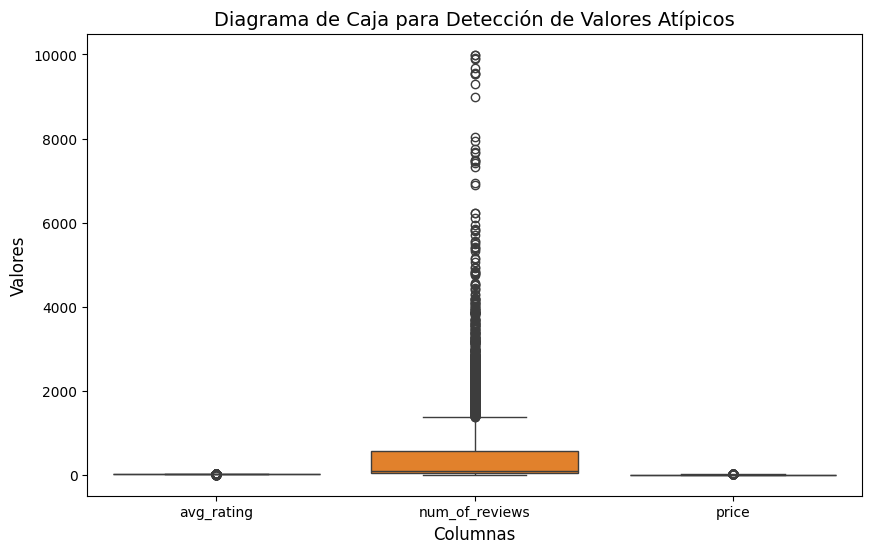

In [80]:
# Graficar un boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_filtrado)

# Etiquetas y título
plt.title('Diagrama de Caja para Detección de Valores Atípicos', fontsize=14)
plt.xlabel('Columnas', fontsize=12)
plt.ylabel('Valores', fontsize=12)

# Mostrar el gráfico
plt.show()

El gráfico de caja es efectivo para identificar valores atípicos en las tres columnas.
"num_of_reviews" muestra la mayor variabilidad y la presencia de muchos valores atípicos altos, lo que sugiere que algunas aplicaciones son mucho más populares que otras.
"avg_rating" y "price" tienen distribuciones más concentradas, con algunos valores atípicos que pueden requerir una mayor investigación

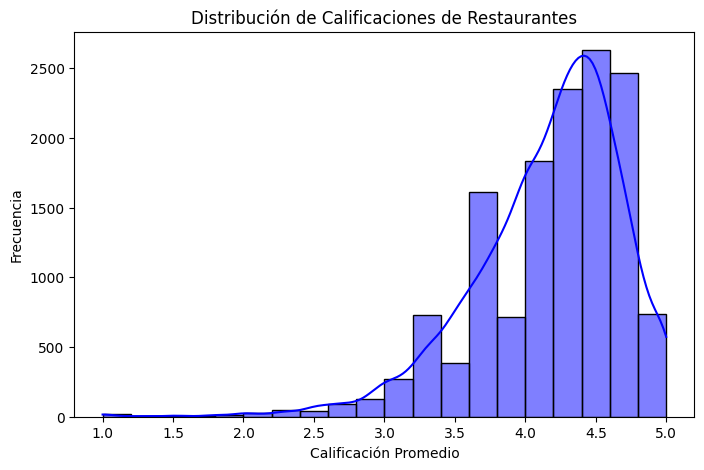

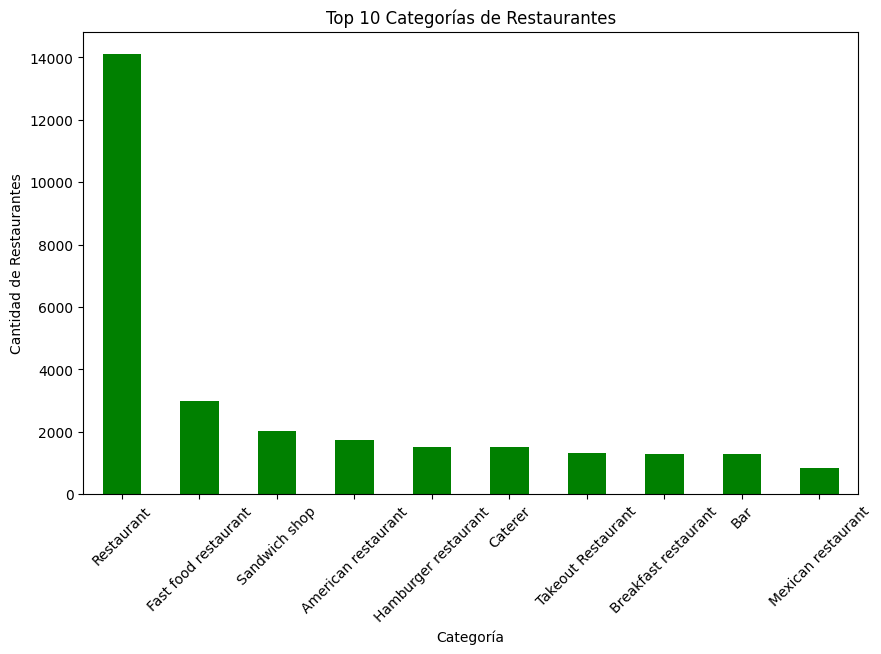

In [81]:
# Distribución de calificaciones
plt.figure(figsize=(8, 5))
sns.histplot(df_restaurants['avg_rating'].dropna(), bins=20, kde=True, color="blue")
plt.xlabel("Calificación Promedio")
plt.ylabel("Frecuencia")
plt.title("Distribución de Calificaciones de Restaurantes")
plt.show()
# Conteo de categorías de restaurantes
plt.figure(figsize=(10, 6))
df_restaurants['category'].explode().value_counts().head(10).plot(kind='bar', color="green")
plt.xlabel("Categoría")
plt.ylabel("Cantidad de Restaurantes")
plt.title("Top 10 Categorías de Restaurantes")
plt.xticks(rotation=45)
plt.show()

Calificaciones de Restaurantes: Los clientes tienden a calificar mejor a los restaurantes, con una mayoría que otorga calificaciones promedio altas. Esto podría indicar una buena calidad general de los restaurantes o una tendencia de los clientes a dejar reseñas más positivas.
Categorías de Restaurantes: Se necesita la imagen completa para analizar las 10 categorías principales. Sin embargo, la barra visible sugiere que una categoría es mucho más común o popular que las demás.

La categoría "Restaurant" tiene una frecuencia significativamente mayor que todas las demás categorías. Esto sugiere que esta categoría es muy amplia y podría incluir una variedad de tipos de restaurantes.
Las categorías "Fast food restaurant", "Sandwich shop", "American restaurant" y "Hamburger restaurant" tienen frecuencias relativamente altas, lo que indica que estos tipos de restaurantes son bastante comunes.
Las categorías "Caterer", "Takeout restaurant", "Breakfast restaurant", "Bar" y "Mexican restaurant" tienen frecuencias más bajas, lo que sugiere que son menos comunes en el conjunto de datos.

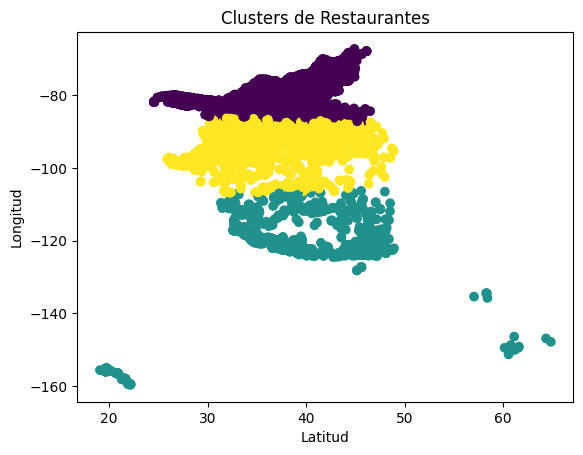

In [82]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Seleccionar columnas relevantes
df_cluster = df_restaurants[['latitude', 'longitude', 'price']]

# Realizar K-means (eligiendo 3 clusters como ejemplo)
kmeans = KMeans(n_clusters=3)
df_restaurants['cluster'] = kmeans.fit_predict(df_cluster)

# Graficar los clusters
plt.scatter(df_restaurants['latitude'], df_restaurants['longitude'], c=df_restaurants['cluster'], cmap='viridis')
plt.title('Clusters de Restaurantes')
plt.xlabel('Latitud')
plt.ylabel('Longitud')
plt.show()


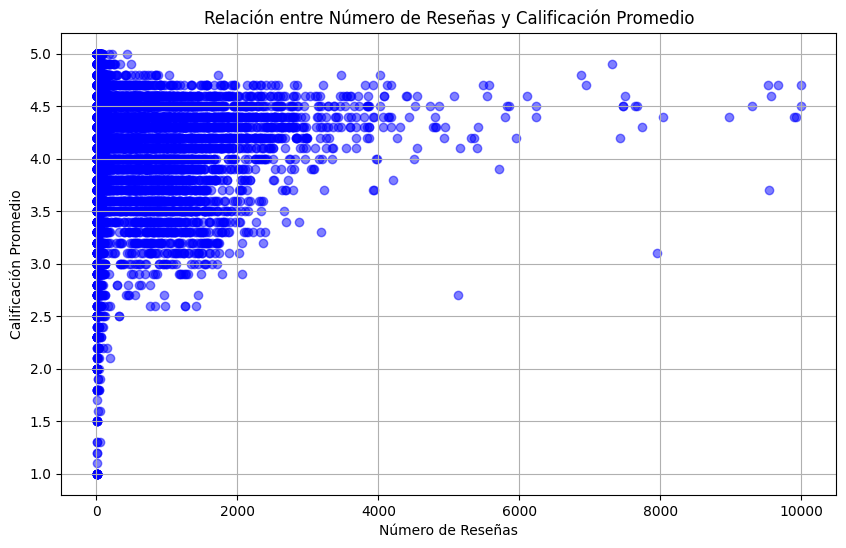

In [83]:
plt.figure(figsize=(10, 6))
plt.scatter(df_restaurants['num_of_reviews'], df_restaurants['avg_rating'], color='blue', alpha=0.5)
plt.title('Relación entre Número de Reseñas y Calificación Promedio')
plt.xlabel('Número de Reseñas')
plt.ylabel('Calificación Promedio')
plt.grid(True)
plt.show()


El gráfico muestra una dispersión de puntos, donde cada punto representa un restaurante, con su ubicación determinada por su número de reseñas y su calificación promedio.
Hay una alta concentración de puntos en la parte inferior izquierda del gráfico, lo que indica que hay muchos restaurantes con pocas reseñas y calificaciones promedio bajas.
A medida que aumenta el número de reseñas, la dispersión de los puntos se extiende a lo largo de un rango más amplio de calificaciones promedio.
Hay algunos puntos atípicos en la parte superior derecha del gráfico, lo que indica que hay algunos restaurantes con un número muy alto de reseñas y calificaciones promedio altas.
No parece haber una correlación lineal fuerte entre el número de reseñas y la calificación promedio. Sin embargo, hay una tendencia general de que los restaurantes con un mayor número de reseñas tienden a tener calificaciones promedio más altas.

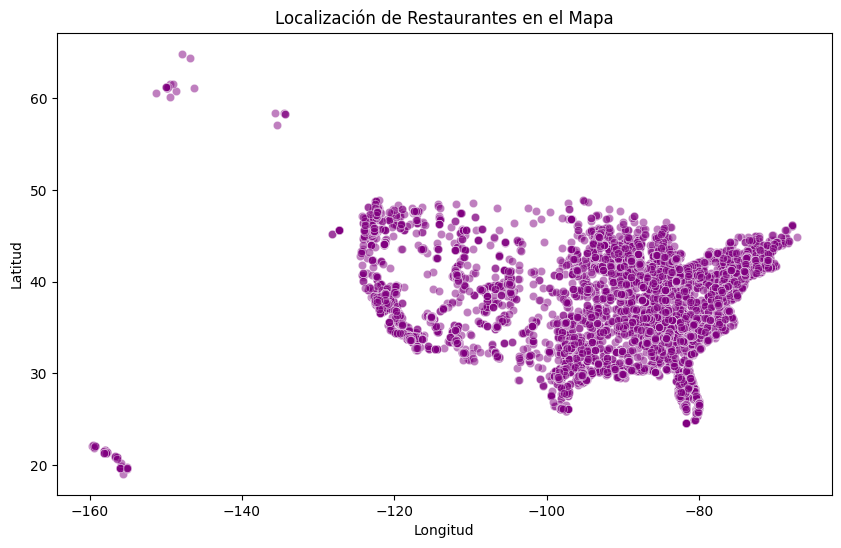

In [84]:
import seaborn as sns

# Gráfico de dispersión de latitud y longitud
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_restaurants, x='longitude', y='latitude', color='purple', alpha=0.5)
plt.title('Localización de Restaurantes en el Mapa')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()


El gráfico muestra una dispersión de puntos que representan la ubicación de restaurantes en un mapa.
La forma general de la distribución de los puntos sugiere que los restaurantes están ubicados en los Estados Unidos continentales, con una alta concentración en la parte central y este del país.
Hay algunos puntos dispersos en la parte inferior izquierda del gráfico, lo que sugiere que hay algunos restaurantes ubicados en Alaska o Hawái.
Hay una clara concentración de puntos que delinean aproximadamente la forma de los Estados Unidos continentales, lo que indica que los datos están geográficamente referenciados con precisión.
La densidad de puntos varía en diferentes regiones, lo que sugiere que hay una mayor concentración de restaurantes en ciertas áreas metropolitanas o ciudades importantes.

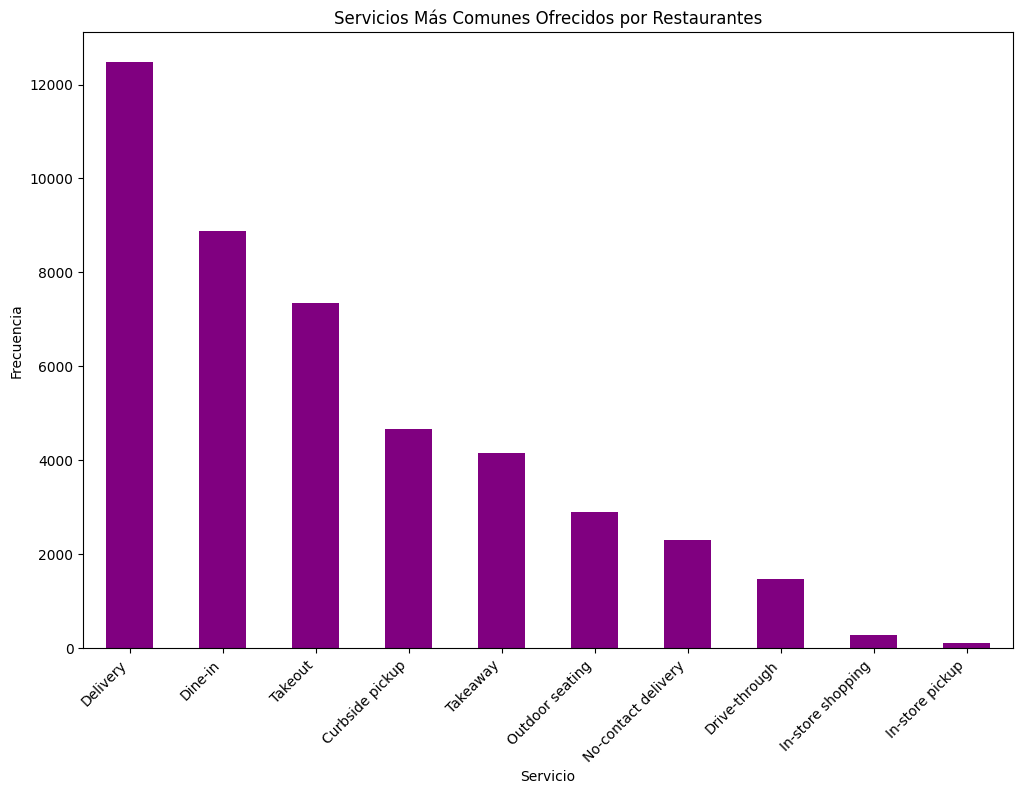

In [85]:
import json

# Filtrar las filas no vacías y luego aplicar json.loads solo en ellas
def safe_json_load(x):
    try:
        if isinstance(x, str) and x.strip():  # Verifica que x sea una cadena no vacía
            return json.loads(x)  # Intentar convertir
        return x  # Retorna el valor original si no es una cadena válida
    except json.JSONDecodeError:
        return x  # Retorna el valor original si no es un JSON válido

# Aplicar la función a la columna 'MISC'
df_restaurants['MISC'] = df_restaurants['MISC'].apply(safe_json_load)

# Ahora podemos proceder con el análisis
services = df_restaurants['MISC'].apply(lambda x: x.get('Service options', []) if isinstance(x, dict) else [])
service_counts = [service for sublist in services for service in sublist]
service_counts = pd.Series(service_counts).value_counts()

# Gráfico de barras de los servicios más comunes
plt.figure(figsize=(12, 8))
service_counts.head(10).plot(kind='bar', color='purple')
plt.title('Servicios Más Comunes Ofrecidos por Restaurantes')
plt.xlabel('Servicio')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.show()


El servicio de entrega a domicilio es el servicio más común ofrecido por los restaurantes en el conjunto de datos.
Comer en el restaurante y la comida para llevar también son servicios populares.
Los servicios de recogida en la acera, comida para llevar, asientos al aire libre y entrega sin contacto tienen una frecuencia moderada.
Los servicios de autoservicio, compras en la tienda y recogida en la tienda son menos comunes.

conclusion:El análisis de los gráficos proporciona una visión integral del panorama de los restaurantes en el conjunto de datos. Hemos observado una clara tendencia hacia la entrega a domicilio como el servicio más frecuente, lo que refleja la creciente demanda de conveniencia y la adaptación a los estilos de vida modernos. Los servicios tradicionales como comer en el restaurante y la comida para llevar siguen siendo populares, lo que indica que aún son componentes esenciales de la oferta de los restaurantes.

La distribución geográfica de los restaurantes muestra una alta concentración en los Estados Unidos continentales, con una mayor densidad en las áreas metropolitanas y ciudades importantes. Los clusters geográficos sugieren que los restaurantes están agrupados en diferentes regiones, posiblemente representando barrios, ciudades o tipos de restaurantes específicos.

La relación entre el número de reseñas y la calificación promedio revela que, si bien no hay una correlación lineal fuerte, los restaurantes con un mayor número de reseñas tienden a tener calificaciones promedio más altas. Esto sugiere que la popularidad y la calidad a menudo van de la mano.

En cuanto a las categorías de restaurantes, la categoría "Restaurant" es la más frecuente, lo que indica que es una categoría amplia que podría incluir una variedad de tipos de restaurantes. Los restaurantes de comida rápida, sándwiches, comida americana y hamburguesas también son comunes, lo que refleja la popularidad de estos tipos de cocina.

En general, el análisis destaca la importancia de la entrega a domicilio, la comida para llevar y la ubicación geográfica en el éxito de los restaurantes. También subraya la necesidad de que los restaurantes se adapten a las demandas de los consumidores modernos y ofrezcan una variedad de servicios para satisfacer las diferentes necesidades y preferencias.

In [86]:
import os

# Verificar si la carpeta existe, y si no, crearla
carpeta_destino = r'C:\Users\yanin\OneDrive\Desktop\proyecto final\archivos\google\metadata-sitios-20250315T151227Z-002\metadata-sitios-modificado'
if not os.path.exists(carpeta_destino):
    os.makedirs(carpeta_destino)

# Guardar el archivo CSV en la carpeta
df_restaurants.to_csv(os.path.join(carpeta_destino, '10.csv'), index=False)

print("\nAnálisis completado y guardado en '8.csv'")


Análisis completado y guardado en '8.csv'
